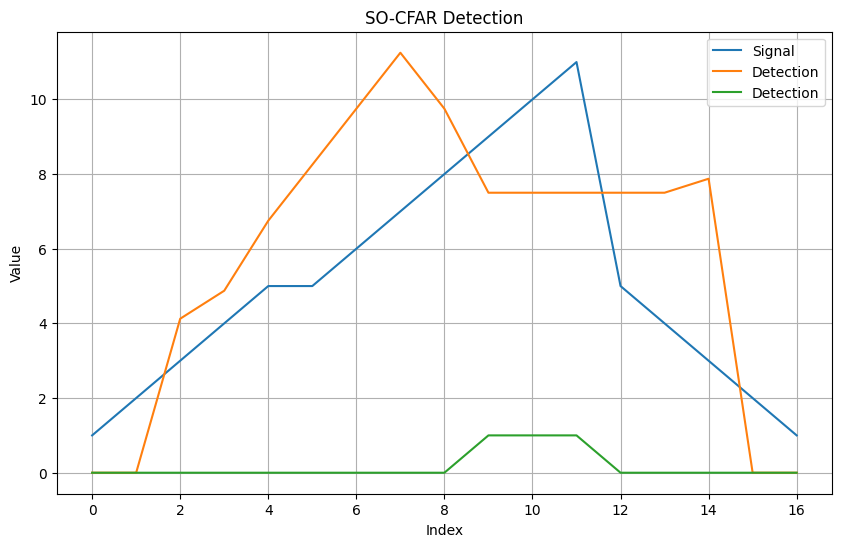

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def socfar(signal, window_size, guard_cells, threshold):
    num_cells = len(signal)
    output = np.zeros(num_cells)  # 初始化输出
    threshold_array = np.zeros(num_cells)

    for i in range(guard_cells, num_cells - guard_cells):
        sum_reference = np.sum(signal[i - guard_cells:i]) + np.sum(signal[i + 1:i + guard_cells + 1])
        average_reference = sum_reference / (2 * guard_cells)

        sum_background = np.sum(signal[i - window_size // 2:i - guard_cells]) + np.sum(signal[i + guard_cells + 1:i + window_size // 2 + 1])
        average_background = sum_background / (window_size - 2 * guard_cells)

        threshold_value = threshold * average_background
        threshold_array[i] = threshold_value
        if signal[i] > threshold_value:
            output[i] = 1

    return output,threshold_array

# 示例数据
signal = np.array([1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 5, 4, 3, 2, 1])
window_size = 8
guard_cells = 2
threshold = 1.5

output,threshold_array = socfar(signal, window_size, guard_cells, threshold)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Signal')
plt.plot(threshold_array, label='Detection')
plt.plot(output, label='Detection')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SO-CFAR Detection')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    # alpha赋值有些问题，一个比较复杂的高次函数
    alpha = N * (PAD ** (-1 / N) - 1)

    index = np.arange(1 + N//2 + pro_N//2, len(xc) - N//2 - pro_N//2)
    XT = np.zeros(len(index))

    for i in index:
        cell_left = xc[i - N//2 - pro_N//2:i - pro_N//2]
        cell_right = xc[i + pro_N//2 + 1:i + N//2 + pro_N//2 + 1]
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])

        XT[i - N//2 - pro_N//2] = Z * alpha

    return index, XT

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def env_uniform(variance, shape, power_db, show_out=False):
    if not show_out:
        show_out = 0

    c = 10**(power_db/10)  # 这里是幅度——功率，实际的噪声功率
    xc = c + np.random.normal(0, variance, shape)  # 产生一个正态分布/高斯分布的噪声，期望为0，标准差为variance，shape形状的数组

    if show_out:
        plt.figure()
        plt.plot(10 * np.log10(np.abs(xc)) / np.log10(10))
        plt.show()

    return xc

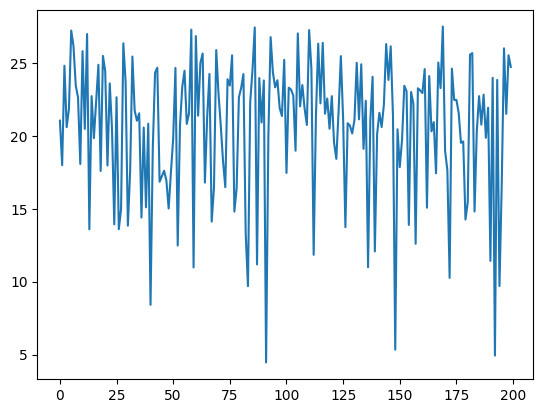

In [7]:
shape = [200]
variance = 200
noise_db = 20
show_out = 1

xc = env_uniform(variance, shape, noise_db, show_out)

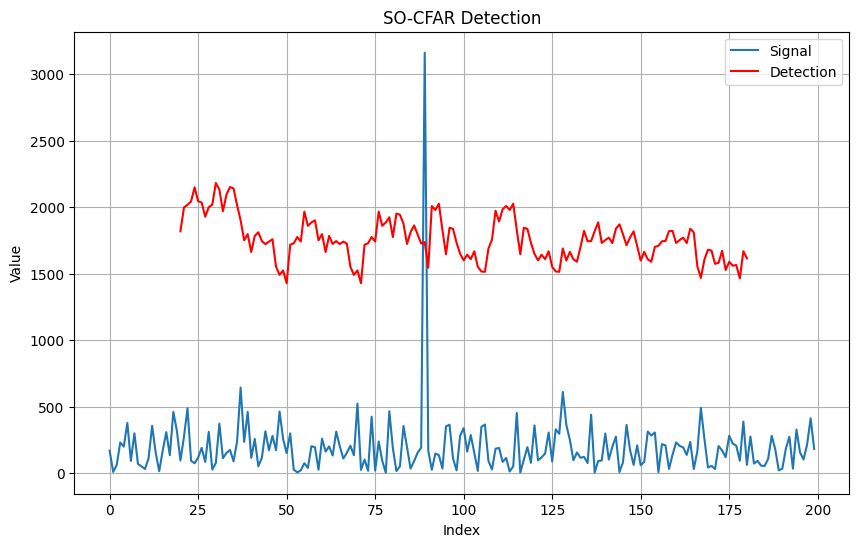

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def cfar_so(xc, N, pro_N, PAD):
    # 假设回波服从高斯分布
    alpha = N * (PAD ** (-1 / N) - 1)

    index = np.arange(1 + N//2 + pro_N//2, len(xc) - N//2 - pro_N//2)
    XT = np.zeros(len(index))

    for i in index:
        cell_left = xc[i - N//2 - pro_N//2:i - pro_N//2]
        cell_right = xc[i + pro_N//2 + 1:i + N//2 + pro_N//2 + 1]
        Z = np.min([np.mean(cell_left), np.mean(cell_right)])

        XT[i - N//2 - pro_N//2-1] = Z * alpha

    return index, XT

# 均匀背景噪声
def env_uniform(variance, shape, power_db, show_out=False):
    if not show_out:
        show_out = 0

    c = 10**(power_db/10)  # 这里是幅度——功率，实际的噪声功率
    xc = c + np.random.normal(0, variance, shape)  # 产生一个正态分布/高斯分布的噪声，期望为0，标准差为variance，shape形状的数组

    if show_out:
        plt.figure()
        plt.plot(10 * np.log10(np.abs(xc)) / np.log10(10))
        plt.show()

    return xc

# 设置参数
SNR1 = 15
N = 36
pro_N = 2
PAF = 10**(-4)

# 生成噪声信号
variance = 200
shape = (200,)
noise_db = 20
noise_p = 10**(noise_db/10)
xc = env_uniform(variance, shape, noise_db)

# 添加信号
signal1_p = 10**(SNR1/10) * noise_p
xc[89] = signal1_p

# 应用CFAR算法
index, XT = cfar_so(np.abs(xc), N, pro_N, PAF)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(np.abs(xc), label='Signal')
plt.plot(index, XT, 'r', label='Detection')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('SO-CFAR Detection')
plt.legend()
plt.grid(True)
plt.show()